1. dateCrawled: при первом сканировании этого объявления все значения полей . берутся с этой даты.

2. name: "имя" автомобиля

3. seller(продавец): частный или дилер

4. offerType

5. price(цена): цена по объявлению о продаже автомобиля

6. abtest(воздерживаться)

7. vehicleType(тип машины)

8. yearOfRegistration: в каком году автомобиль был впервые зарегистрирован

9. gearbox(коробка передач)

10. powerPS: мощность автомобиля в л.с.

11. model(модель)

12. kilometer(километр): сколько километров проехала машина

13. monthOfRegistration: в каком месяце автомобиль был впервые зарегистрирован

14. fuelType(тип топлива)

15. brand(марка)

16. notRepairedDamage(не устраненные повреждения): если у автомобиля есть повреждения, которые еще не отремонтированы

17. dateCreated: дата создания объявления на ebay.

18. nrOfPictures : количество картинок в объявлении (к сожалению, это поле везде содержит 0 и поэтому бесполезно (ошибка сканера!))

19. postalCode(почтовый код)

20. lastSeenOnline : когда поисковый робот последний раз видел это объявление онлайн.
Поля lastSeen и dateCreated можно использовать для оценки того, как долго автомобиль будет по крайней мере онлайн, прежде чем он будет продан.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
path = "/content/drive/MyDrive/Данные/autos.csv"
car_df = pd.read_csv(path, sep = ",", encoding='latin-1')
print(car_df.head())

           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  

In [ ]:
car_df.shape # размер набора данных 

(371528, 20)

In [ ]:
car_df.drop_duplicates(keep = 'first', inplace = True) # удаление повторяющихся строк
car_df.shape

(371524, 20)

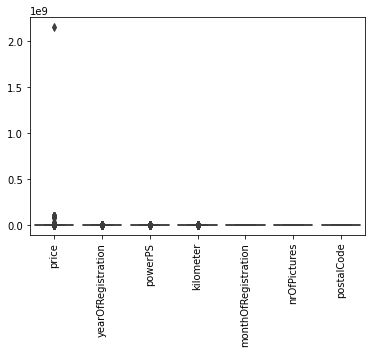

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.xticks(rotation='vertical')
sns.boxplot(data = car_df) # диаграмма BoxPlot для признаков до масштабирования

In [ ]:
numerical_columns = [i for i in car_df.columns[1:21] if car_df[i].dtype.name != 'object']
categorial_columns = [i for i in car_df.columns[1:21] if car_df[i].dtype.name == 'object']
columns = numerical_columns

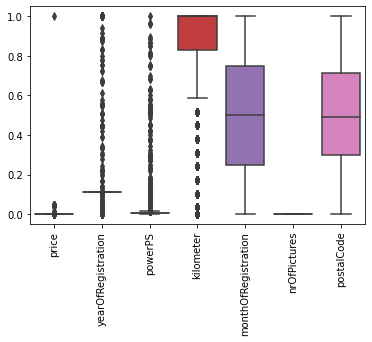

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() # масштабирует(нормализация) все функции данных в диапазоне [0, 1] 

car_df[columns] = scaler.fit_transform(car_df[columns]) # одновременно и обучаемся и преобразуем тренировочные данные

plt.xticks(rotation='vertical')
sns.boxplot(data = car_df) # диаграмма BoxPlot для признаков после масштабирования

In [ ]:
from sklearn import preprocessing
label=preprocessing.LabelEncoder()
car_df=car_df.apply(label.fit_transform)
car_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,164563,79207,1,0,256,1,8,88,1,0,118,12,0,1,38,2,99,0,4901,178839
1,164294,4112,1,0,3587,1,3,106,1,190,251,11,5,3,1,0,99,0,4618,178355
2,76564,90564,1,0,2590,1,7,99,0,163,119,11,8,3,14,2,89,0,6998,162956
3,106204,76592,1,0,696,1,4,96,1,75,118,12,6,1,38,1,92,0,7038,45272
4,231164,170493,1,0,1333,1,4,103,1,69,103,9,7,3,31,1,106,0,4215,171913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,79620,177981,1,0,923,1,8,100,2,0,251,2,1,7,33,2,89,0,2920,168588
371524,5117,175587,1,0,568,1,2,95,0,101,108,11,3,1,32,1,80,0,1824,16325
371525,121891,214317,1,0,2492,1,1,91,1,102,225,12,3,3,38,1,94,0,6638,180083
371526,131927,191702,1,0,1274,1,5,97,1,100,118,12,6,3,38,2,95,0,2977,82280


                     dateCrawled      name    seller  offerType     price  \
dateCrawled             1.000000  0.000127  0.001265  -0.000116  0.019073   
name                    0.000127  1.000000  0.000963   0.003211 -0.114604   
seller                  0.001265  0.000963  1.000000   0.000016  0.001413   
offerType              -0.000116  0.003211  0.000016   1.000000 -0.003356   
price                   0.019073 -0.114604  0.001413  -0.003356  1.000000   
abtest                 -0.012905  0.002107  0.001052  -0.002105 -0.000076   
vehicleType            -0.009001 -0.088397 -0.000336   0.002864 -0.105204   
yearOfRegistration      0.000540 -0.014485  0.004451  -0.002834  0.382984   
gearbox                -0.002436  0.101206  0.001049   0.007601 -0.333761   
powerPS                 0.008934 -0.217371  0.002624  -0.006275  0.552691   
model                  -0.001397  0.395386 -0.000162   0.001647 -0.053554   
kilometer              -0.005253 -0.018833  0.000118  -0.005602 -0.375127   

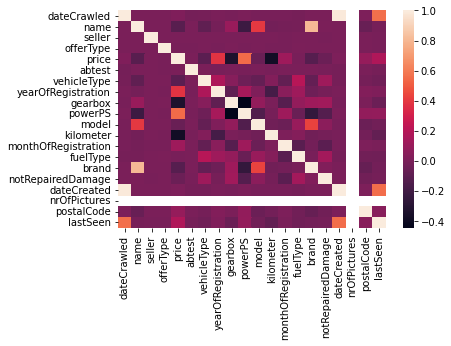

In [ ]:
corr_matrix = car_df.corr()
sns.heatmap(corr_matrix); # это графическое представление данных, где дополнительные переменные отображаются при помощи цвета
print(corr_matrix)

In [ ]:
x = car_df.drop('gearbox', axis = 1)
y = car_df['gearbox']

from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y) # разделение данных на обучающие и тестовые наборы

from sklearn.linear_model import LinearRegression 
regressor = LinearRegression() 
regressor.fit(x_train, y_train) # обучение алгоритма

LinearRegression()

In [ ]:
regressor.coef_ # такие коэффициенты выбрала наша регрессионная модель

array([ 1.51680490e-08, -6.74764379e-08,  3.94477931e-01,  2.59762489e-01,
       -7.29636117e-05, -7.54039569e-04, -2.87079390e-03,  7.37002892e-04,
       -2.32603392e-03,  4.13266729e-05, -1.05937395e-02, -5.81698631e-03,
        1.54822220e-02,  6.52645110e-04,  6.06229329e-02, -4.14921052e-05,
        2.77555756e-17,  1.29145983e-05,  2.75045964e-08])

In [ ]:
y_pred = regressor.predict(x_test) # прогнозы на тестовых данных

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Accuracy': abs(y_test-y_pred)})
df # сравнение фактических выходных значений для X_test с прогнозируемыми значениями

,Actual,Predicted,Accuracy
76299,1,0.869804,0.130196
155932,1,0.803941,0.196059
37173,1,0.943191,0.056809
261398,1,0.948791,0.051209
3212,1,0.686802,0.313198
...,...,...,...
349413,1,0.794647,0.205353
293295,1,0.628925,0.371075
203249,0,0.471744,0.471744
257396,1,0.737052,0.262948


In [ ]:
import numpy as np
Acc = np.mean(abs(y_test-y_pred))
print ('Точность: ', Acc)

Точность:  0.3101852686821818


In [ ]:
df['Actual'].corr(df['Predicted'], method='pearson')

0.48060751874208735

In [ ]:
df['Actual'].corr(df['Predicted'], method='spearman')

0.4471611298531017

In [ ]:
from sklearn import linear_model
model = linear_model.LassoCV()
model.fit(x_train, y_train) # обучение алгоритма

LassoCV()

In [ ]:
model.coef_ # такие коэффициенты выбрала наша регрессионная модель

array([ 1.23273403e-08,  2.02299282e-07,  0.00000000e+00,  0.00000000e+00,
       -8.37024343e-05, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -1.65185967e-03,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  1.05023947e-05,  1.91726244e-08])

In [ ]:
y_pred = model.predict(x_test) # прогнозы на тестовых данных

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Accuracy': abs(y_test-y_pred)})
df # сравнение фактических выходных значений для X_test с прогнозируемыми значениями

,Actual,Predicted,Accuracy
76299,1,0.800407,0.199593
155932,1,0.828285,0.171715
37173,1,0.901826,0.098174
261398,1,0.811968,0.188032
3212,1,0.816106,0.183894
...,...,...,...
349413,1,0.819263,0.180737
293295,1,0.746449,0.253551
203249,0,0.579323,0.579323
257396,1,0.700145,0.299855


In [ ]:
Acc = np.mean(abs(y_test-y_pred))
print ('Точность: ', Acc)

Точность:  0.30580589010463155


In [ ]:
df['Actual'].corr(df['Predicted'], method='pearson')

0.4549179264843646

In [ ]:
df['Actual'].corr(df['Predicted'], method='spearman')

0.4319907105031515